## Investigate Business Hotel using Data Visualization
Code by Windy Nurfikri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('hotel_bookings_data.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
data.duplicated().sum()

33261

In [5]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [7]:
cats = [col for col in data.columns if (data[col].dtype == 'object')]
nums = [col for col in data.columns if (data[col].dtype != 'object')]

print(f'cats = {cats}')
print()
print(f'nums = {nums}')

cats = ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']

nums = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [8]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
data[cats].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [10]:
print("Data Variables Unique Values List:\n")
for col in data.columns:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Data Variables Unique Values List:

Value count kolom hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count kolom is_canceled:
0    75166
1    44224
Name: is_canceled, dtype: int64

Value count kolom lead_time:
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
458       1
371       1
737       1
435       1
387       1
Name: lead_time, Length: 479, dtype: int64

Value count kolom arrival_date_year:
2018    56707
2019    40687
2017    21996
Name: arrival_date_year, dtype: int64

Value count kolom arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64

Value count kolom arrival_date_week_number:
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763

#### Conclusion
The following are whats were found after checking basic information and the solutions will be performed to handle it.
- 33261 duplicated rows will be dropped.
- `company` has so many (>90%) missing (null) data, will be dropped.
- impute missing value in `children` with 0 and change its data type into 'int64', because it must be integer and mean/median is around 0.
- impute missing value in `agent` with 0.
- `city` has many categorical value, will be dropped.
- replace 'Undefined' value in `meal` with 'No Meal'.

## Pre-processing

In [12]:
df1 = data.copy()

#drop duplicated or 'noise' data
df1.drop_duplicates(inplace=True)
df1.drop(columns=['company','city'], inplace=True)


#impute null values
df1[['children','agent']] = df1[['children','agent']].fillna(0)


#change data type
df1['children'] = df1['children'].astype('int64')


#replace value
df1['meal'].replace({'Undefined':'No Meal'}, inplace=True)

In [13]:
#checking guest
df1['total_guest'] = df1['adults'] + df1['children'] + df1['babies']

(df1['total_guest'] == 0).sum()

165

In [14]:
#drop unnecessary data
df1 = df1[(df1['total_guest'] > 0)]

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85964 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85964 non-null  object 
 1   is_canceled                     85964 non-null  int64  
 2   lead_time                       85964 non-null  int64  
 3   arrival_date_year               85964 non-null  int64  
 4   arrival_date_month              85964 non-null  object 
 5   arrival_date_week_number        85964 non-null  int64  
 6   arrival_date_day_of_month       85964 non-null  int64  
 7   stays_in_weekend_nights         85964 non-null  int64  
 8   stays_in_weekdays_nights        85964 non-null  int64  
 9   adults                          85964 non-null  int64  
 10  children                        85964 non-null  int64  
 11  babies                          85964 non-null  int64  
 12  meal                           

In [16]:
print("Data Variables Unique Values List:\n")
for col in df1.columns:
    print(f'''Value count kolom {col}:''')
    print(df1[col].value_counts())
    print()

Data Variables Unique Values List:

Value count kolom hotel:
City Hotel      52422
Resort Hotel    33542
Name: hotel, dtype: int64

Value count kolom is_canceled:
0    62244
1    23720
Name: is_canceled, dtype: int64

Value count kolom lead_time:
0      5853
1      3187
2      1914
3      1693
4      1550
       ... 
424       1
507       1
458       1
463       1
400       1
Name: lead_time, Length: 479, dtype: int64

Value count kolom arrival_date_year:
2018    41764
2019    31364
2017    12836
Name: arrival_date_year, dtype: int64

Value count kolom arrival_date_month:
October      11135
September     9973
July          8231
June          7803
August        7648
May           7411
December      6706
November      6449
April         6020
February      5063
January       4901
March         4624
Name: arrival_date_month, dtype: int64

Value count kolom arrival_date_week_number:
33    2752
34    2470
32    2433
28    2322
30    2303
31    2271
29    2188
27    2153
35    2073
18    2065

## Analyzing

### Monthly Book by Hotel Type

The booking data contains 3 arrival date year. so, we need to input `arrival_date_year` as data spliter to get monthly booking for each hotel type.

In [19]:
h_type = df1.groupby(['hotel', 'arrival_date_year','arrival_date_month'])['reservation_status'].count().reset_index(name='total_reservation')
h_type.sample(5)

,hotel,arrival_date_year,arrival_date_month,total_reservation
30,Resort Hotel,2017,October,1344
4,City Hotel,2017,October,1054
51,Resort Hotel,2019,September,1665
43,Resort Hotel,2018,September,1360
11,City Hotel,2018,July,2299


In [20]:
monthly_book = h_type.groupby(['hotel', 'arrival_date_month'])['total_reservation'].mean().round(0).reset_index()
monthly_book

,hotel,arrival_date_month,total_reservation
0,City Hotel,April,1773.0
1,City Hotel,August,2460.0
2,City Hotel,December,2024.0
3,City Hotel,February,1484.0
4,City Hotel,January,1438.0
5,City Hotel,July,2667.0
6,City Hotel,June,2514.0
7,City Hotel,March,1346.0
8,City Hotel,May,2399.0
9,City Hotel,November,2028.0


In [22]:
#sort values for visualization
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_book['arrival_date_month'] = pd.Categorical(monthly_book['arrival_date_month'], categories=months, ordered=True)
monthly_book

,hotel,arrival_date_month,total_reservation
0,City Hotel,April,1773.0
1,City Hotel,August,2460.0
2,City Hotel,December,2024.0
3,City Hotel,February,1484.0
4,City Hotel,January,1438.0
5,City Hotel,July,2667.0
6,City Hotel,June,2514.0
7,City Hotel,March,1346.0
8,City Hotel,May,2399.0
9,City Hotel,November,2028.0


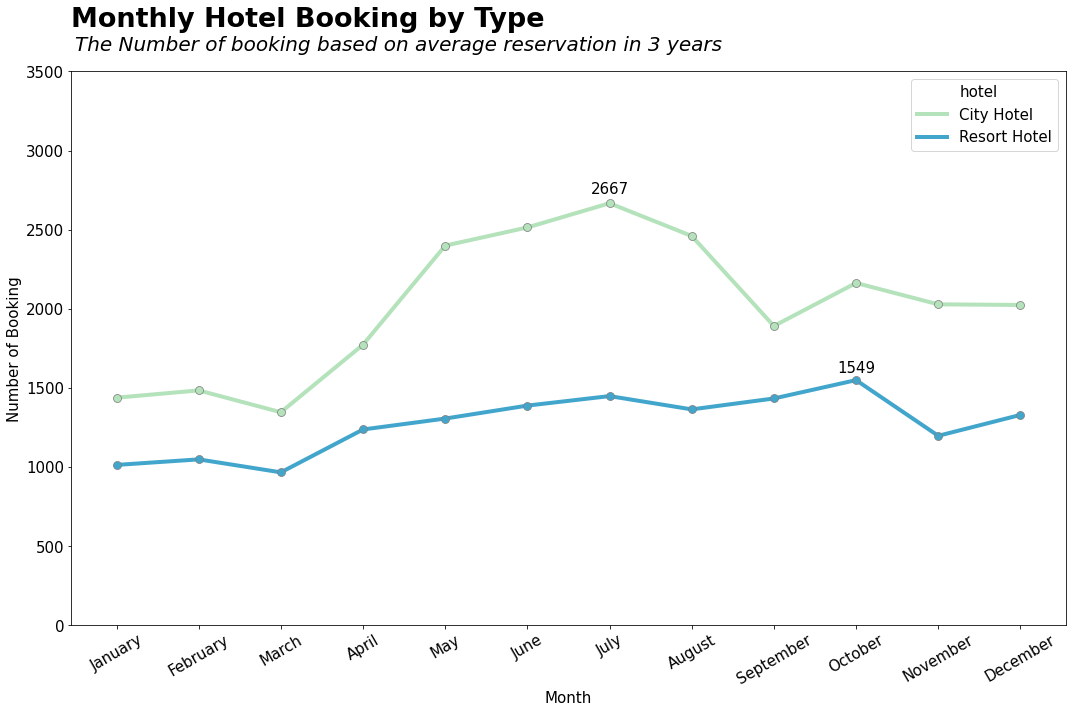

In [46]:
plt.figure(figsize=(15,10))
book = sns.lineplot(x='arrival_date_month', y='total_reservation', data=monthly_book, hue='hotel', 
                    marker='o', markersize=8, markeredgecolor='grey', palette='GnBu', size='hotel', sizes=(4, 4))


#set axis
plt.ylim(0,3500)
plt.tick_params(axis='both', which='major', labelsize=15)

#set label
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Booking', fontsize=15)


#set legend, title, and sub-title
plt.legend(title_fontsize=10, prop={'size':15}, fontsize='x-large')

plt.title("Monthly Hotel Booking by Type", loc='left', y=1.07, fontsize=27, weight='bold')
book.text(x=-0.5, y=3630,
               s="The Number of booking based on average reservation in 3 years",
              fontsize=20, style='italic')

plt.text(x=6, y=2730, s="2667", fontsize=15, ha='center')
plt.text(x=9, y=1600, s="1549", fontsize=15, ha='center')


plt.tight_layout()
#plt.savefig('monthly_booking.png')

### Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rate

In [47]:
df2 = df1.copy()

#define stay duration
df2['stay_duration'] = df2['stays_in_weekend_nights'] + df2['stays_in_weekdays_nights']
df2['stay_duration']

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: stay_duration, Length: 85964, dtype: int64

<AxesSubplot:>

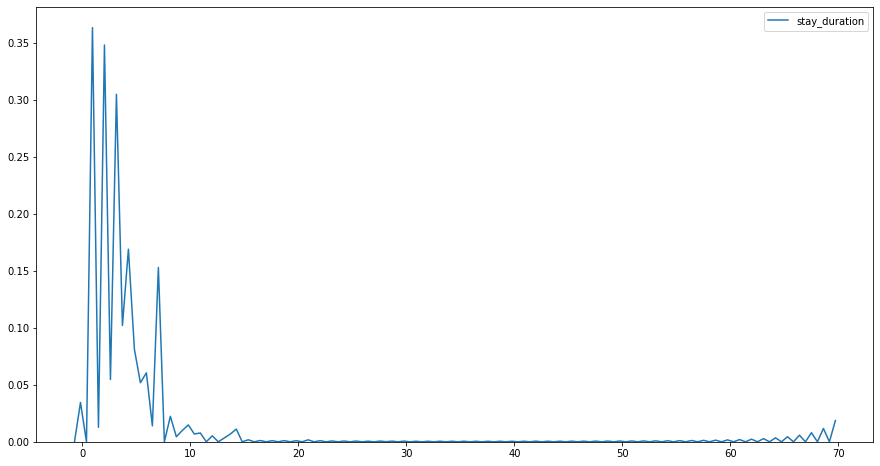

In [48]:
plt.figure(figsize=(15,8))
sns.kdeplot(df2['stay_duration'])

Mostly people stays in hotel under 10 days. Therefore, it's better if we make the threshold based on week.

In [49]:
def week(x):
    if x['stay_duration'] > 28:
        week = '>4 weeks'
    elif x['stay_duration'] > 21:
        week = '4 weeks'
    elif x['stay_duration'] > 14:
        week = '3 weeks'
    elif x['stay_duration'] > 7:
        week = '2 weeks'
    else:
        week = '1 week'
    return week

In [50]:
df2['duration_segment'] = df2.apply(lambda x: week(x), axis=1)

df2.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,stay_duration,duration_segment
101400,City Hotel,0,3,2018,January,46,10,0,1,1,...,0.0,0,Family,95.0,0,0,Check-Out,1,1,1 week


Find out cancellation rate

In [51]:
df2['total_cancel'] = df2['is_canceled'].apply(lambda x: 1 if x == 1 else 0)
df2['total_check_in'] = df2['is_canceled'].apply(lambda x: 1 if x == 0 else 0)

df2.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,stay_duration,duration_segment,total_cancel,total_check_in
29422,Resort Hotel,0,240,2018,December,43,21,2,5,2,...,Contract,74.75,0,2,Check-Out,2,7,1 week,0,1
114233,City Hotel,0,184,2019,August,24,16,1,2,2,...,Personal,89.10,0,1,Check-Out,2,3,1 week,0,1


In [53]:
duration = df2.copy()

duration = duration.groupby(['hotel', 'duration_segment']).agg({'total_cancel':'sum', 'total_check_in':'sum'}).reset_index()

duration['total_booking'] = duration['total_cancel'] + duration['total_check_in']
duration['cancel_rate'] = round(duration['total_cancel'] / duration['total_booking'] * 100, 1)

duration

,hotel,duration_segment,total_cancel,total_check_in,total_booking,cancel_rate
0,City Hotel,1 week,15205,36063,51268,29.7
1,City Hotel,2 weeks,523,486,1009,51.8
2,City Hotel,3 weeks,73,27,100,73.0
3,City Hotel,4 weeks,21,4,25,84.0
4,City Hotel,>4 weeks,18,2,20,90.0
5,Resort Hotel,1 week,6868,23010,29878,23.0
6,Resort Hotel,2 weeks,939,2511,3450,27.2
7,Resort Hotel,3 weeks,47,87,134,35.1
8,Resort Hotel,4 weeks,20,36,56,35.7
9,Resort Hotel,>4 weeks,6,18,24,25.0


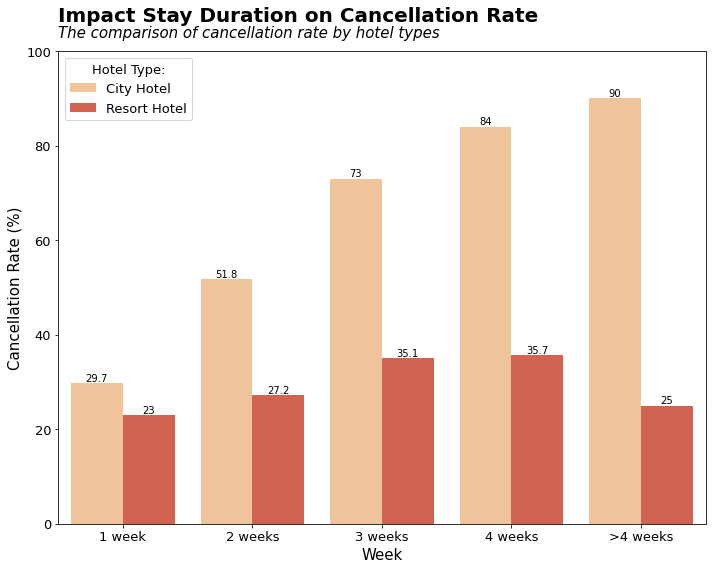

In [60]:
plt.figure(figsize=(10,8))
cancel = sns.barplot(x='duration_segment', y='cancel_rate', data=duration, hue='hotel', palette='OrRd')


#set axis and legend
plt.tick_params(axis='both', which='major', labelsize=13)
plt.ylim(0,100)
plt.legend (title='Hotel Type:', title_fontsize=13, prop={'size':13})


#set title and sub-title
plt.title("Impact Stay Duration on Cancellation Rate", loc='left', y=1.05, fontsize=20, weight='bold')
cancel.text(x=-0.5, y=103,
               s="The comparison of cancellation rate by hotel types", fontsize=15, style='italic')


#set label
plt.xlabel('Week', fontsize=15)
plt.ylabel('Cancellation Rate (%)', fontsize=15)

for i in cancel.containers:
    cancel.bar_label(i)
    

plt.tight_layout()
#plt.savefig('cancellation_rate.png')

### Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

<AxesSubplot:>

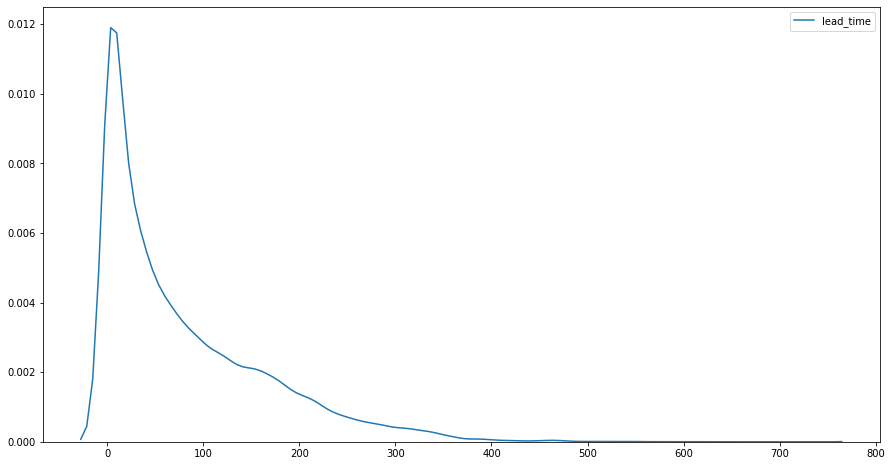

In [62]:
plt.figure(figsize=(15,8))
sns.kdeplot(df2['lead_time'])

The graphic of `lead_time` starts to flat after 350 days. It's better to set the threshold based on month, then i choose to determine it into quarter.

In [63]:
def quarter(x):
    if x['lead_time'] > 360:
        quarter = '>4th quarter'
    elif x['lead_time'] > 270:
        quarter = '4th quarter'
    elif x['lead_time'] > 180:
        quarter = '3rd quarter'
    elif x['lead_time'] > 90:
        quarter = '2nd quarter'
    else:
        quarter = '1st quarter'
    return quarter

In [64]:
df2['lead_time_segment'] = df2.apply(lambda x: quarter(x), axis=1)

df2.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,stay_duration,duration_segment,total_cancel,total_check_in,lead_time_segment
70811,City Hotel,1,13,2019,August,25,23,0,2,2,...,160.0,0,0,Canceled,2,2,1 week,1,0,1st quarter
96473,City Hotel,0,35,2018,October,36,30,0,4,2,...,119.0,0,1,Check-Out,2,4,1 week,0,1,1st quarter


In [65]:
ltime = df2.copy()

ltime = ltime.groupby(['hotel', 'lead_time_segment']).agg({'total_cancel':'sum', 'total_check_in':'sum'}).reset_index()

ltime['total_booking'] = ltime['total_cancel'] + ltime['total_check_in']
ltime['cancel_rate'] = round(ltime['total_cancel'] / ltime['total_booking'] * 100, 1)

ltime

,hotel,lead_time_segment,total_cancel,total_check_in,total_booking,cancel_rate
0,City Hotel,1st quarter,8912,26116,35028,25.4
1,City Hotel,2nd quarter,4166,7175,11341,36.7
2,City Hotel,3rd quarter,1819,2523,4342,41.9
3,City Hotel,4th quarter,744,596,1340,55.5
4,City Hotel,>4th quarter,199,172,371,53.6
5,Resort Hotel,1st quarter,3919,17671,21590,18.2
6,Resort Hotel,2nd quarter,2124,4487,6611,32.1
7,Resort Hotel,3rd quarter,1241,2408,3649,34.0
8,Resort Hotel,4th quarter,553,892,1445,38.3
9,Resort Hotel,>4th quarter,43,204,247,17.4


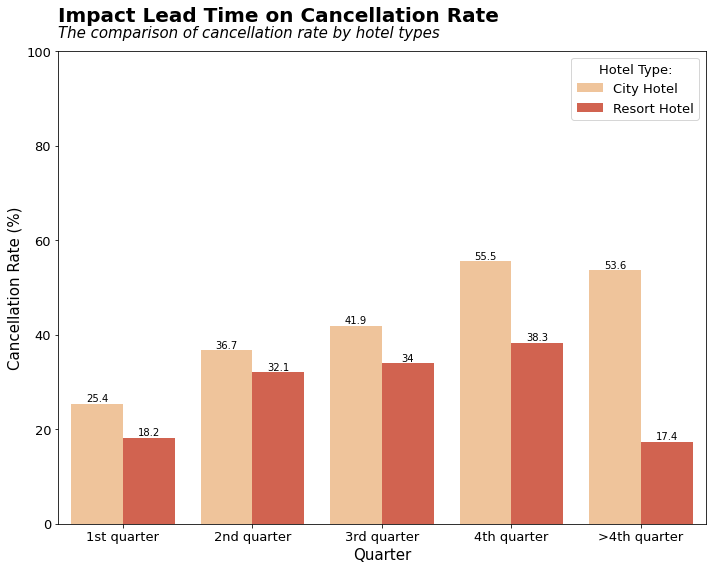

In [67]:
plt.figure(figsize=(10,8))
time = sns.barplot(x='lead_time_segment', y='cancel_rate', data=ltime, hue='hotel', palette='OrRd')

#set axis and legend
plt.tick_params(axis='both', which='major', labelsize=13)
plt.ylim(0,100)
plt.legend (title='Hotel Type:', title_fontsize=13, prop={'size':13})


#set title and sub-title
plt.title("Impact Lead Time on Cancellation Rate", loc='left', y=1.05, fontsize=20, weight='bold')
time.text(x=-0.5, y=103,
               s="The comparison of cancellation rate by hotel types", fontsize=15, style='italic')


#set label
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Cancellation Rate (%)', fontsize=15)

for i in time.containers:
    time.bar_label(i)
    

plt.tight_layout()
plt.savefig('cancellation_rate2.png')